## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# The mouse_metadata seems to be the DF that best defines a mouse.  The merge will create multiple
# entries based on a timepount, but the results cannot exist without a mouse, and the mouse 
# exising without results may make no sense, but lets determine that later.  Do a left merge
# keeping mouse meta data
mouse_study_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

In [2]:
# the number of unique records in mouse_metadata to compare below
print(mouse_metadata.nunique())

Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64


In [3]:
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the DataFrame.
# Does the need to be the number of unique Mouse ID records.  I am assuming so as the question would be poised differently
print(mouse_study_df['Mouse ID'].nunique())
# another option is showing counts
mouse_study_df['Mouse ID'].count()

249


1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# This seems to be a group by having count() > 1
mouse_data_groups = mouse_study_df.groupby(['Mouse ID', 'Timepoint'])
# size is the function that provides the size of the group by.
size = mouse_data_groups.size().reset_index()
duplicate_data = size[size[0] > 1]['Mouse ID'].unique()
duplicate_mouse_id =  duplicate_data[0]
duplicate_mouse_id

'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Set the index so that loc can be used to find it
mouse_study_df.set_index('Mouse ID', inplace=True)

# Copy the data so as not to corrupt the dataframe that will be used going forward
mouse_data_copy_df = mouse_study_df.copy()

duplicate_mouse_data = mouse_data_copy_df.loc[[duplicate_mouse_id]]
duplicate_mouse_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[mouse_study_df.index != duplicate_mouse_id]
clean_mouse_study_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [8]:
# Checking the number of mice in the clean DataFrame.
# Note: There is one less unique Mouse ID and 13 reduced record count which matches what is expected
print(clean_mouse_study_df.index.nunique())
# another option is showing counts
clean_mouse_study_df.count()

248


Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_regimen = clean_mouse_study_df.groupby('Drug Regimen')
group_data = pd.DataFrame() 

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#gropuby_regimen.value_counts()
group_data['Mean'] = groupby_regimen['Tumor Volume (mm3)'].mean()
group_data['Median'] = groupby_regimen['Tumor Volume (mm3)'].median()
group_data['Variance'] = groupby_regimen['Tumor Volume (mm3)'].var()
group_data['Standard Deviation'] = groupby_regimen['Tumor Volume (mm3)'].std()
group_data['SEM'] = groupby_regimen['Tumor Volume (mm3)'].sem()

group_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# create empty lists to add the data to
summary_regimen = []
summary_mean = []
summary_median = []
summary_variance = []
summary_stddev = []
summary_SEM = []

specific_regimen_data_df = []

# Get the unique regimen
regimens = np.sort(clean_mouse_study_df['Drug Regimen'].unique())
print(type(regimens))
tumor_data_df = clean_mouse_study_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Iterate through each regimen
for regimen in regimens:
    # Capture the current regimen
    summary_regimen.append(regimen)
    
    # Capture the data associated with that regimen
    specific_regimen = tumor_data_df.loc[(clean_mouse_study_df['Drug Regimen'] == regimen)]
    
    # Add the required statistic values to their respective lists
    summary_mean.append(specific_regimen.mean())
    summary_median.append(specific_regimen.median())    
    summary_variance.append(specific_regimen.var())
    summary_stddev.append(specific_regimen.std())
    summary_SEM.append(specific_regimen.sem())
    #print(f"{regimen} :=> mean: {regimen_mean}, median: {regimen_median}")

# concatenate all of the series together
summary_data_df = pd.concat([pd.DataFrame(summary_regimen)
                             , pd.DataFrame(summary_mean)
                             , pd.DataFrame(summary_median)
                             , pd.DataFrame(summary_variance)
                             , pd.DataFrame(summary_stddev)
                             , pd.DataFrame(summary_SEM)]
                            , axis=1)


#rename columns as they are all 0
summary_data_df.columns = ["Drug Regimen", "Mean", "Median", "Variance", "Standard Deviation", "SEM"]

# sort the data and set index to Regimen
summary_data_df.sort_values("Drug Regimen", inplace=True)
summary_data_df.set_index('Drug Regimen', inplace=True)

summary_data_df

<class 'numpy.ndarray'>


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

timepoints = clean_mouse_study_df["Timepoint"].unique()

# Generate the data frames to be used by both methods
group_data = pd.DataFrame() 

for regimen in regimens:
    specific_regimen = clean_mouse_study_df.loc[(clean_mouse_study_df['Drug Regimen'] == regimen)]
    groupby_regimen = specific_regimen.groupby('Timepoint')

    group_data[regimen] = groupby_regimen.count()['Sex']
    
mice_by_timepoint = group_data
# Get the maximum value in the first row....assuming that there will not be mice added after beginnging
max_number_of_mice = mice_by_timepoint.iloc[0:1].max(axis=1)[0]

['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']


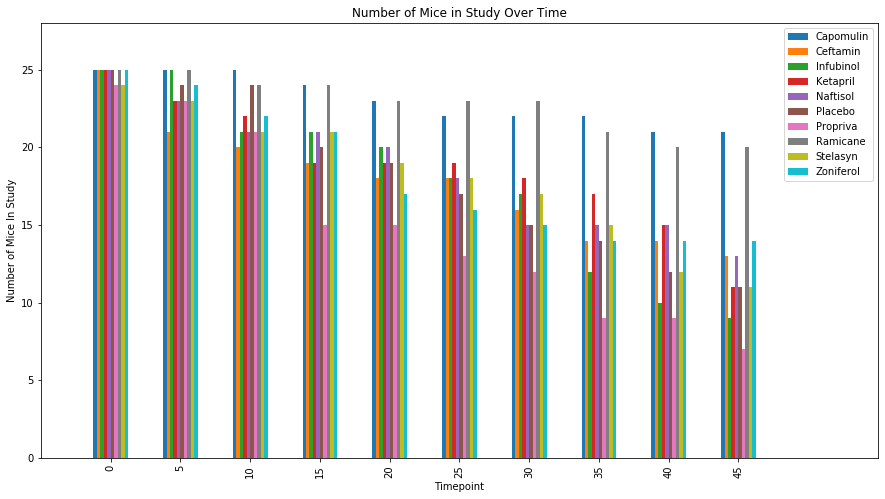

In [12]:
# This is the panda dataframe way
# The x-axis is made up of the time points....get a numpy array of time points
print(regimens)
ax = mice_by_timepoint.plot(kind='bar', figsize=(15,8), title='Number of Mice in Study Over Time', legend=True)
ax.set_ylabel("Number of Mice In Study")
ax.set_ylim(0, max_number_of_mice + 3)
ax.set_xlim(-1, len(timepoints) + 1)

# Had to google to determine how to set loc 'Best' for dataframe plots
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

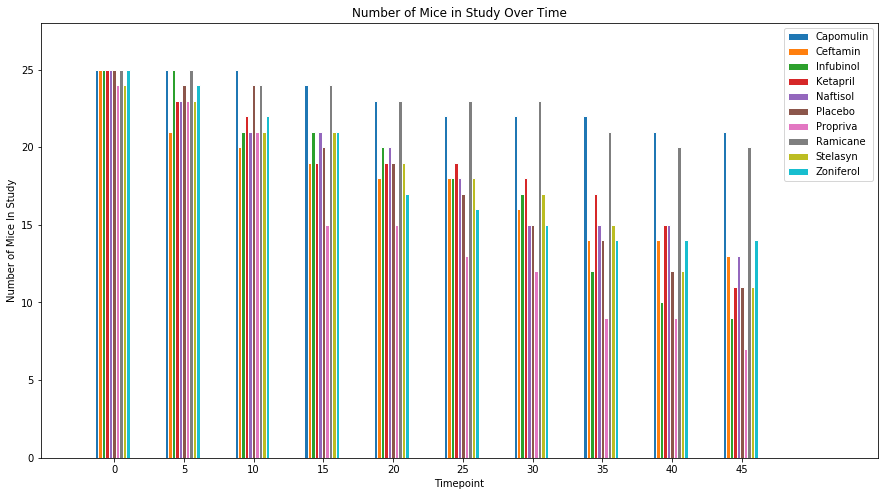

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# set width of bar
barWidth = 0.05

# Create subplots, the size should be the same as with the other bar graph
fig, ax = plt.subplots(figsize=(15,8))

# Create a list of barchart data.  There will be an entry for each regimen
barchart_data_list = []

# value for previous barchart to indicate first one
previous_barchart = ''

#regimens = ['Capomulin', 'Ceftamin']
for regimen in regimens:
    x = ''
    # The first entry will be based on simple range of time points
    if previous_barchart == '':
        # The .2 is an offset so that the tick will be more central
        x = [val - .2 for val in np.arange(len(timepoints))]
    else:
        x = [val + barWidth for val in previous_barchart]

    # set previous_barchart to correctly set x range based on previous
    previous_barchart = x
    
    # append the data as a dictionary to the list
    barchart_data_list.append({'name': regimen
                               , 'data' : group_data[regimen]
                               , 'x_axis' : x})

# Iterate through each regimen that is now represented in barchart data list
for barchart_data in barchart_data_list:
    # pull the information out of the dictionary items to plot the bar graph
    plt.bar(barchart_data['x_axis']
            , barchart_data['data']
            , width=barWidth
            , edgecolor='white'
            , label=barchart_data['name'])

# Set the xticks based on the specified barwidth
plt.xticks([r + barWidth for r in range(len(timepoints))], timepoints)

# set the legend to the best location 
plt.legend(loc='best')

# Set the x and y labels to same as before
#TODO: convert to variable to allow for standardization
plt.xlabel('Timepoint')
plt.ylabel('Number of Mice In Study')

# Set the x and y limits to the same as other bar graph
plt.ylim(0,max_number_of_mice + 3)
plt.xlim(-1, len(timepoints) + 1)

# Set the title to the same as other bar graph
#TODO: convert to variable to allow for standardization
plt.title("Number of Mice in Study Over Time")

plt.show()

## Pie Plots

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#male_mice = clean_mouse_study_df.loc[(clean_mouse_study_df["Sex"] == "Male")]
#female_mice = clean_mouse_study_df.loc[(clean_mouse_study_df["Sex"] == "Female")]

# Generate the data frames to be used by both methods
group_sexdistribution_data = pd.DataFrame() 
sexes = clean_mouse_study_df["Sex"].unique()
#print(sexes)
for regimen in regimens:
    for sex in sexes:
        subgroup = clean_mouse_study_df.loc[ (clean_mouse_study_df['Drug Regimen'] == regimen)
                                           & (clean_mouse_study_df['Sex'] == sex)] 
        key = f"{regimen} {sex}"
        #print(key)
        group_sexdistribution_data[key] = subgroup.count()
    #    ax_pie[regimen] = group_sexdistribution_data[regimen].plot(kind='pie', figsize=(5,18),title='Number of Mice in Study Over Time', legend=True)


pie_chart_data = pd.DataFrame(group_sexdistribution_data.iloc[0])
female_data = pie_chart_data[pie_chart_data.index.str.contains("Female")]
male_data = pie_chart_data[pie_chart_data.index.str.contains("Male")]

Capomulin Male    102
Ceftamin Male      86
Infubinol Male     83
Ketapril Male     130
Naftisol Male     100
Placebo Male       79
Propriva Male      87
Ramicane Male     154
Stelasyn Male      74
Zoniferol Male     63
Name: Drug Regimen, dtype: int64

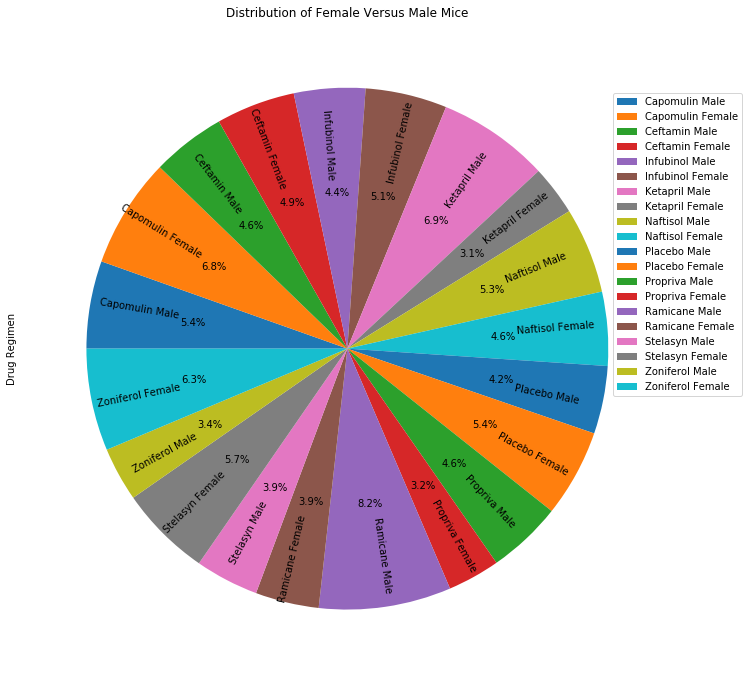

In [148]:
ax = pie_chart_data.plot(kind='pie', y="Drug Regimen", figsize=(12,12)
                             , title="Distribution of Female Versus Male Mice"
                             ,radius=1,  labeldistance=.65, 
              rotatelabels =True, startangle=180,counterclock=False
                             , autopct='%1.1f%%')
patches, labels = ax.get_legend_handles_labels()


ax.legend(patches, labels, bbox_to_anchor=(.9, .9))


In [98]:
ax.legend(patches, labels, loc="lower right", ncol=3, mode="expand")

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
